In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
import seaborn as sns
#hello#

from keras.models import  Sequential
from keras.layers import Dense, Dropout,Conv2D,MaxPool2D,Flatten

In [2]:
(Xtrain,ytrain),(Xtest,ytest) = cifar10.load_data()

In [45]:
print("Xtrain shape :", Xtrain.shape)
print("ytrain shape :", ytrain.shape)
print("Xtest shape :", Xtest.shape)
print("ytest shape :", ytest.shape)
nClasses = len(np.unique(ytrain))
print("Number of classes", nClasses)

('Xtrain shape :', (50000, 32, 32, 3))
('ytrain shape :', (50000, 1))
('Xtest shape :', (10000, 32, 32, 3))
('ytest shape :', (10000, 1))
('Number of classes', 10)


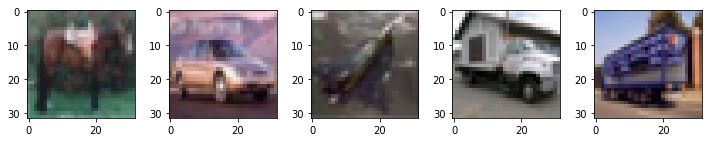

In [10]:
k = np.random.randint(0,len(Xtrain),5)
plt.figure(figsize=(10,10))
for i,v in enumerate(k):
    plt.subplot(1,len(k),i+1)
    plt.imshow(Xtrain[v,:,:])
    plt.tight_layout()
plt.show()

In [41]:
flat = Xtrain.reshape(Xtrain.shape[0],ht_train,wd_train,ch_train)
flat.shape

(50000, 32, 32, 3)

In [49]:
#Preprocessing
num_img_train,ht_train,wd_train,ch_train = Xtrain.shape
inputshape = (ht_train,wd_train,ch_train)
num_img_test,ht_test,wd_test,ch_test = Xtest.shape
#unlike  in MNIST, we dont need to reshape, since we  do convolution first and then use FLatten layer to build fully connected layer

ytrain_oh = to_categorical(ytrain)
ytest_oh = to_categorical(ytest)

In [50]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=inputshape))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses,activation='softmax'))

In [58]:
epochs = 30
batchsize = 256
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 64)          0         
__________

In [60]:
history = model.fit(Xtrain,ytrain_oh,batch_size= batchsize,epochs = epochs,verbose=1,validation_data=(Xtest,ytest_oh))
model.evaluate(Xtest,ytest_oh)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 149s - loss: 2.2806 - acc: 0.2115 - val_loss: 1.8162 - val_acc: 0.3716
Epoch 2/30
50000/50000 [==============================] - 147s - loss: 1.7264 - acc: 0.3738 - val_loss: 1.5935 - val_acc: 0.4176
Epoch 3/30
50000/50000 [==============================] - 148s - loss: 1.5125 - acc: 0.4535 - val_loss: 1.5310 - val_acc: 0.4573
Epoch 4/30
50000/50000 [==============================] - 148s - loss: 1.3778 - acc: 0.5075 - val_loss: 1.2514 - val_acc: 0.5598
Epoch 5/30
50000/50000 [==============================] - 148s - loss: 1.2746 - acc: 0.5517 - val_loss: 1.1771 - val_acc: 0.5979
Epoch 6/30
50000/50000 [==============================] - 148s - loss: 1.1804 - acc: 0.5856 - val_loss: 1.2093 - val_acc: 0.5857
Epoch 7/30
50000/50000 [==============================] - 265s - loss: 1.1104 - acc: 0.6127 - val_loss: 1.0948 - val_acc: 0.6165
Epoch 8/30
50000/50000 [=======================

[0.73723146500587466, 0.75490000000000002]

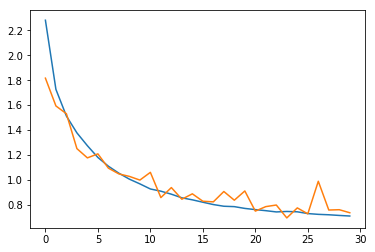

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

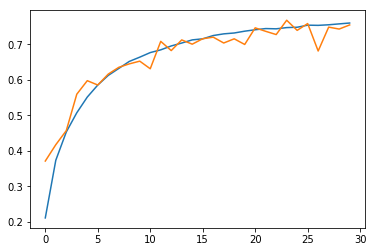

In [65]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()